In [22]:
import pandas as pd
import numpy as np
import physt
from physt import h1, h2, h3
import os
import matplotlib.pyplot as plt
import dask
import glob
%matplotlib inline

In [85]:
def read_data(path, clean=True):
    """Reads the original zipped CSV"""
    data = pd.read_csv(path, delimiter=";", decimal=",", header=None, names=["datetime", "place", "temperature"])
    data["datetime"] = pd.to_datetime(data["datetime"])
    data["id"] = data.place.str.extract("(?<=\\\\)(.*)(?=\\\\)").str.lower()
    data["year"] = data.datetime.dt.year
    data["month"] = data.datetime.dt.month
    data["hour"] = data.datetime.dt.hour
    data["day_of_year"] = data.datetime.dt.dayofyear
    data["day_of_week"] = (data.datetime.dt.dayofweek - 1) % 7 + 1
    data["second_of_day"] = data.datetime.dt.hour * 3600 + data.datetime.dt.minute * 60 + data.datetime.dt.second
    if clean:
        data = data[(data["temperature"] < 50) & (data["temperature"] > -40)]
    return data

/home/honza/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [9]:
data.columns

Index(['datetime', 'place', 'temperature', 'id', 'year', 'month', 'hour',
       'day_of_year', 'day_of_week', 'second_of_day'],
      dtype='object')

In [6]:
data.id.unique()

array(['e1jasstr', 'e2jasstr', 'e3dubstr', 'e4dubstr', 'f1serstr',
       'f2sosstr', 'g1brestr'], dtype=object)

In [30]:
for path in glob.glob("teplarny/*zip"):
    # path = "teplarny/{0}.zip".format(ctvrt)
    ctvrt = os.path.basename(path).split(".")[0]
    print(ctvrt)
    data = read_data(path)
    os.makedirs("data/{0}".format(ctvrt), exist_ok=True)
    for id_ in data.id.unique():
        subdata = data[data.id == id_]
        h = h3([subdata.month, subdata.hour, subdata.temperature],
                           ("integer", "fixed_width", "fixed_width"),
                           bin_width=(1, 1, 1),
                           adaptive=True,
                           name=id_)
        h_path = "data/{0}/{1}.json".format(ctvrt, id_)
        h.to_json(path=h_path)

Bohunice


/home/honza/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


Bystrc
Chrlice
Juliánov
Jundrov
Kamenný Vrch
Kohoutovice
Komárov
Komín
Královo Pole
Lesná
Líšeň
Medlánky
Město
Nový Lískovec
Obřany
Ponava
Slatina
Staré Brno
Starý Lískovec
Trnitá
Veveří
Vinohrady
Černovice
Černá Pole
Řečkovice
Štýřice
Žabovřesky
Židenice


In [31]:
avg_temps = {}

for path in glob.glob("teplarny/*zip"):
    # path = "teplarny/{0}.zip".format(ctvrt)
    ctvrt = os.path.basename(path).split(".")[0]
    print(ctvrt)
    data = read_data(path)
    os.makedirs("data/{0}".format(ctvrt), exist_ok=True)
    for id_ in data.id.unique():
        subdata = data[data.id == id_]
        avg_temps[id_] = subdata.temperature.mean()

Bohunice


/home/honza/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


Bystrc
Chrlice
Juliánov
Jundrov
Kamenný Vrch
Kohoutovice
Komárov
Komín
Královo Pole
Lesná
Líšeň
Medlánky
Město
Nový Lískovec
Obřany
Ponava
Slatina
Staré Brno
Starý Lískovec
Trnitá
Veveří
Vinohrady
Černovice
Černá Pole
Řečkovice
Štýřice
Žabovřesky
Židenice


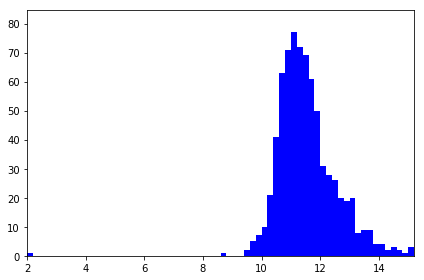

In [40]:
h1(list(avg_temps.values()), "fixed_width", 0.2).plot()

In [67]:
avgs = pd.DataFrame(pd.Series(avg_temps)).reset_index()
avgs.columns = ["id", "avg_temp"]
avgs

,id,avg_temp
0,a_pekstr,13.044112
1,b_srostr,14.471601
2,c_srostr,12.459095
3,cztkastr,11.902292
4,d_janps1,12.875471
5,d_janstr,14.544432
6,dspvostr,12.050481
7,e1jasstr,11.266367
8,e2jasstr,10.610361
9,e3dubstr,10.234445


In [68]:
vysky = pd.read_csv("Adresace_zdroju_s_GPS_vysky_parsed.csv", sep=";")
vysky["avg_temp"] = np.nan
vysky["id"] = vysky["Systém"].str.lower()

In [78]:
merge = vysky.merge(avgs, on="id", suffixes=["x","y"])

(9, 14)

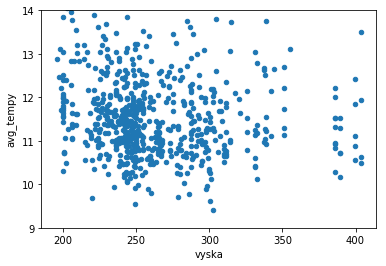

In [82]:
ax = merge.plot.scatter("vyska", "avg_tempy")
ax.set_ylim(9, 14)

In [84]:
subs = merge[["vyska", "avg_tempy"]]
subs.corr()

,vyska,avg_tempy
vyska,1.00000,-0.17433
avg_tempy,-0.17433,1.00000


In [58]:
vysky.head()

,Adresa,Adresa interní,Městská část,GPS lat,GPS lon,vyska,Typ zdroje,Systém,Popis,avg_temp,id
0,Absolonova 26a,PKK1 Absolonov.26a,Komín,49.219944,16.557275,214.6,PK,K1AbsKOT,Kotle K1 Absolonova,NaN,k1abskot
1,Absolonova 26a,PKK1 Absolonov.26a,Komín,49.219944,16.557275,214.6,PK,K1AbsSTR,Topení K1 Absolonova,NaN,k1absstr
2,Absolonova 26a,PKK1 Absolonov.26a,Komín,49.219944,16.557275,214.6,PK,K1AbsMT,Měření K1 Absolonova,NaN,k1absmt
3,Absolonova 26a,PKK1 Absolonov.26a,Komín,49.219944,16.557275,214.6,PK,K1AbsPS1,"14-16,18-20,22-24,26-28",NaN,k1absps1
4,Absolonova 26a,PKK1 Absolonov.26a,Komín,49.219944,16.557275,214.6,PK,AbsPS1MT,"14-16,18-20,22-24,26-28",NaN,absps1mt


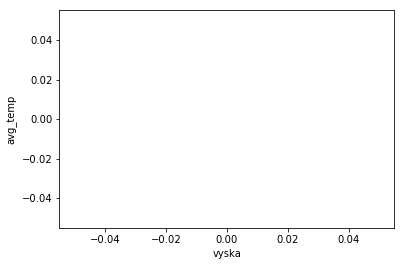

In [59]:
vysky.plot.scatter("vyska", "avg_temp")

In [45]:
vysky.columns

Index(['Adresa', 'Adresa interní', 'Městská část', 'GPS lat', 'GPS lon',
       'vyska', 'Typ zdroje', 'Systém', 'Popis', 'avg_temp'],
      dtype='object')

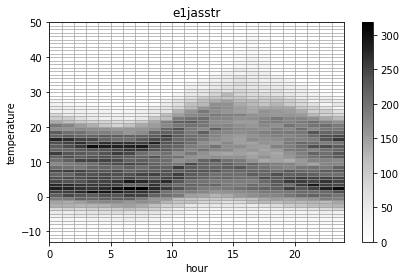

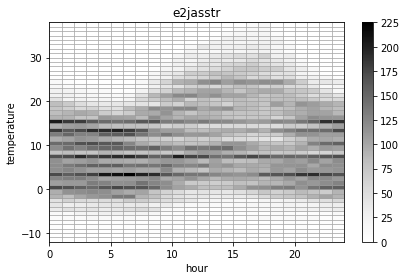

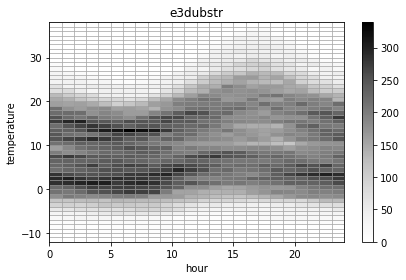

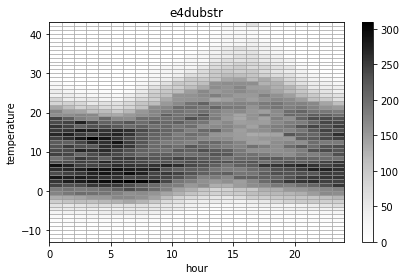

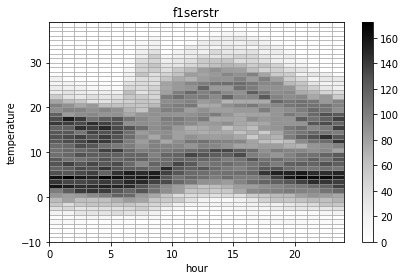

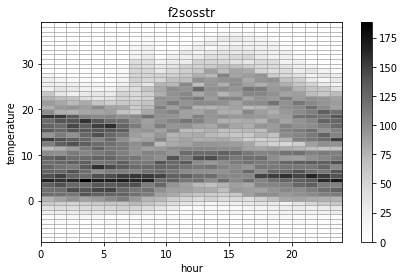

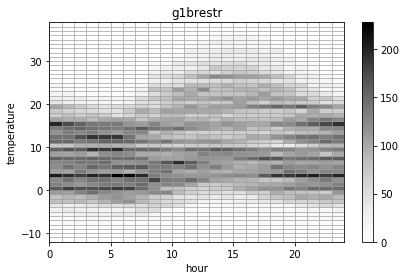

In [20]:
for h in histograms:
    h.projection("hour", "temperature").plot()

/home/honza/code/physt/physt/histogram_base.py:826: UserWarning: Subtracting histograms is considered to be a bad idea.
  warnings.warn("Subtracting histograms is considered to be a bad idea.")


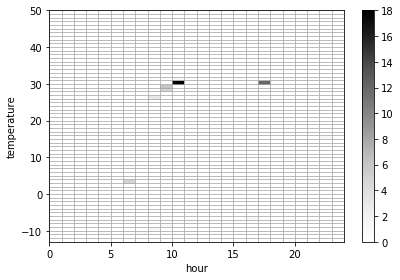

In [21]:
(histograms[1].projection("hour", "temperature") - histograms[0].projection("hour", "temperature")).plot()

In [ ]:
pd.read_csv()